# Problem statement 1) Predict Beer Consumption Based on Climate Conditions

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
# Load the dataset & check its shape

df = pd.read_csv('consumo_carveja.csv')
df.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01-01-2015,"27,3","23,9","32,5",0,0,25.461
1,02-01-2015,"27,02","24,5","33,5",0,0,28.972
2,03-01-2015,"24,82","22,4","29,9",0,1,30.814
3,04-01-2015,"23,98","21,5","28,6","1,2",1,29.799
4,05-01-2015,"23,82",21,"28,3",0,0,28.900


In [3]:
df.shape

(365, 7)

In [4]:
# Rectify the data of the first four column
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].str.replace(',', '.')
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].str.replace(',', '.')
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].str.replace(',', '.')
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].str.replace(',', '.')

In [5]:
import warnings
warnings.filterwarnings("ignore")

# create new features from the 'data' column
df['Data'] = pd.to_datetime(df['Data'])
df['Month'] = df['Data'].dt.month
df['Day'] = df['Data'].dt.dayofweek

In [6]:
df['Month']

0       1
1       2
2       3
3       4
4       5
       ..
360    12
361    12
362    12
363    12
364    12
Name: Month, Length: 365, dtype: int64

In [7]:
df['Day']

0      3
1      6
2      6
3      2
4      4
      ..
360    6
361    0
362    1
363    2
364    3
Name: Day, Length: 365, dtype: int64

In [8]:
# set 'Data' column as the index
df.set_index('Data', inplace=True)

In [9]:
# Handle null and duplicate values

df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
# convert the data types of features
df['Temperatura Media (C)'] = df['Temperatura Media (C)'].astype(float)
df['Temperatura Minima (C)'] = df['Temperatura Minima (C)'].astype(float)
df['Temperatura Maxima (C)'] = df['Temperatura Maxima (C)'].astype(float)
df['Precipitacao (mm)'] = df['Precipitacao (mm)'].astype(float)
df['Consumo de cerveja (litros)'] = df['Consumo de cerveja (litros)'].astype(float)

In [11]:
# Analyze features with outlier values 

import matplotlib.pyplot as plt

In [12]:
# select the numerical features to analyze for outliers
numerical_features = ['Temperatura Media (C)','Temperatura Minima (C)','Temperatura Maxima (C)','Precipitacao (mm)']

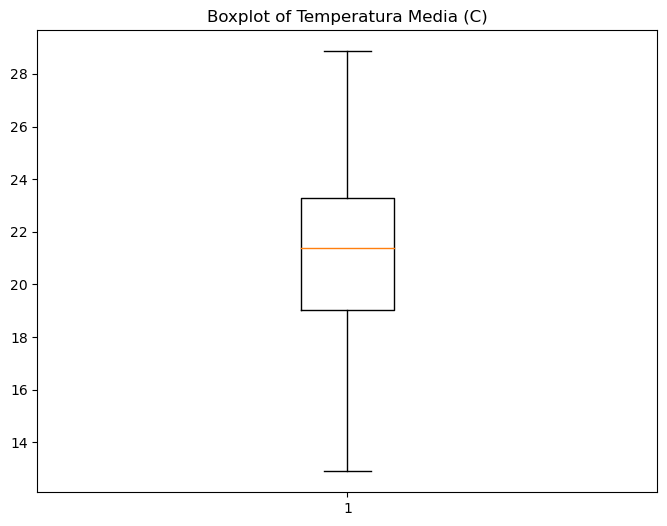

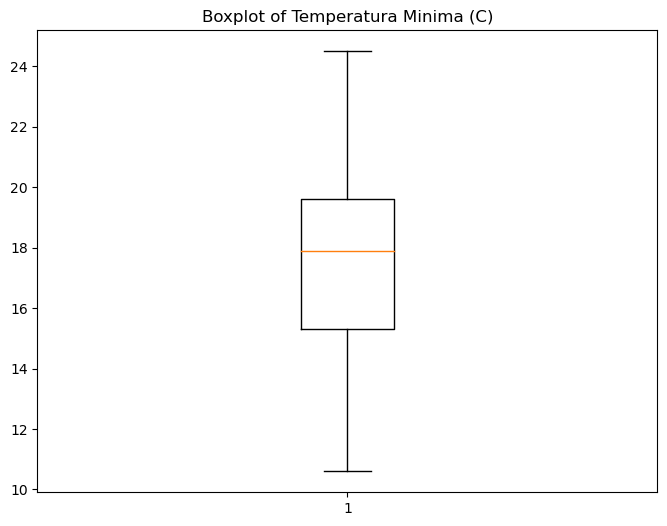

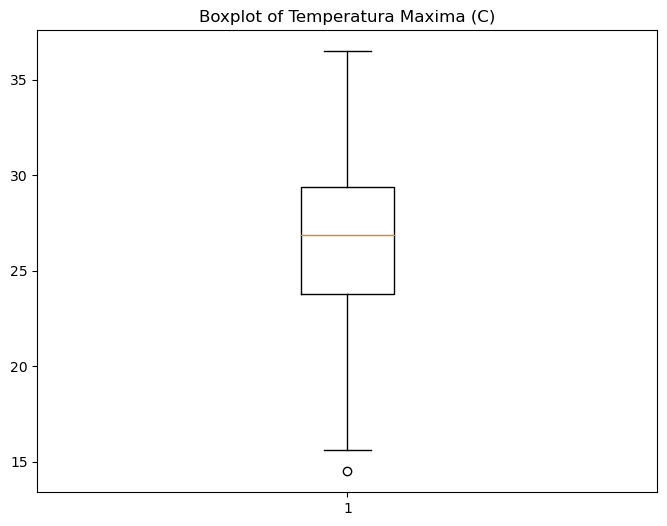

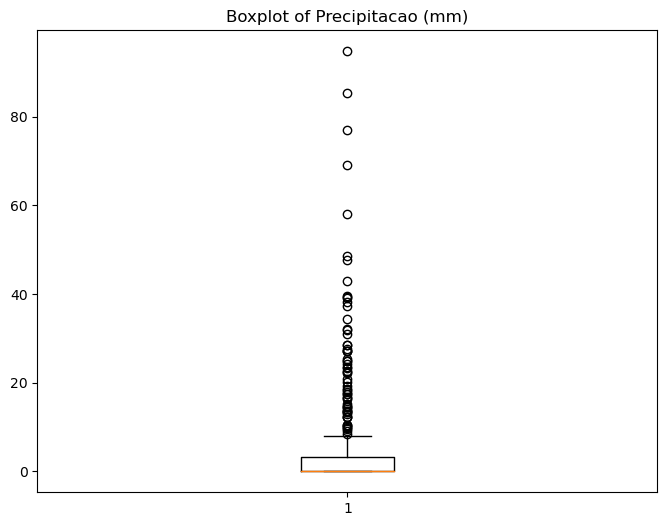

In [13]:
# create box plot for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8,6))
    plt.boxplot(df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [14]:
# calculate the IQR for each numerical feature
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 -Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 - 1.5 * IQR

In [15]:
# Identify outliers based on the IQR method
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

#print the outliers for each feature
print(f'Outliers for {feature}:')
print(outliers)
print('\n')

Outliers for Precipitacao (mm):
            Temperatura Media (C)  Temperatura Minima (C)  \
Data                                                        
2015-01-01                  27.30                    23.9   
2015-02-01                  27.02                    24.5   
2015-03-01                  24.82                    22.4   
2015-04-01                  23.98                    21.5   
2015-05-01                  23.82                    21.0   
...                           ...                     ...   
2015-12-27                  24.00                    21.1   
2015-12-28                  22.64                    21.1   
2015-12-29                  21.68                    20.3   
2015-12-30                  21.38                    19.3   
2015-12-31                  24.76                    20.2   

            Temperatura Maxima (C)  Precipitacao (mm)  Final de Semana  \
Data                                                                     
2015-01-01                

In [16]:
# Plot and analyze the correlation
import seaborn as sns
# calculate the correlation matrix
corr_matrix = df.corr()

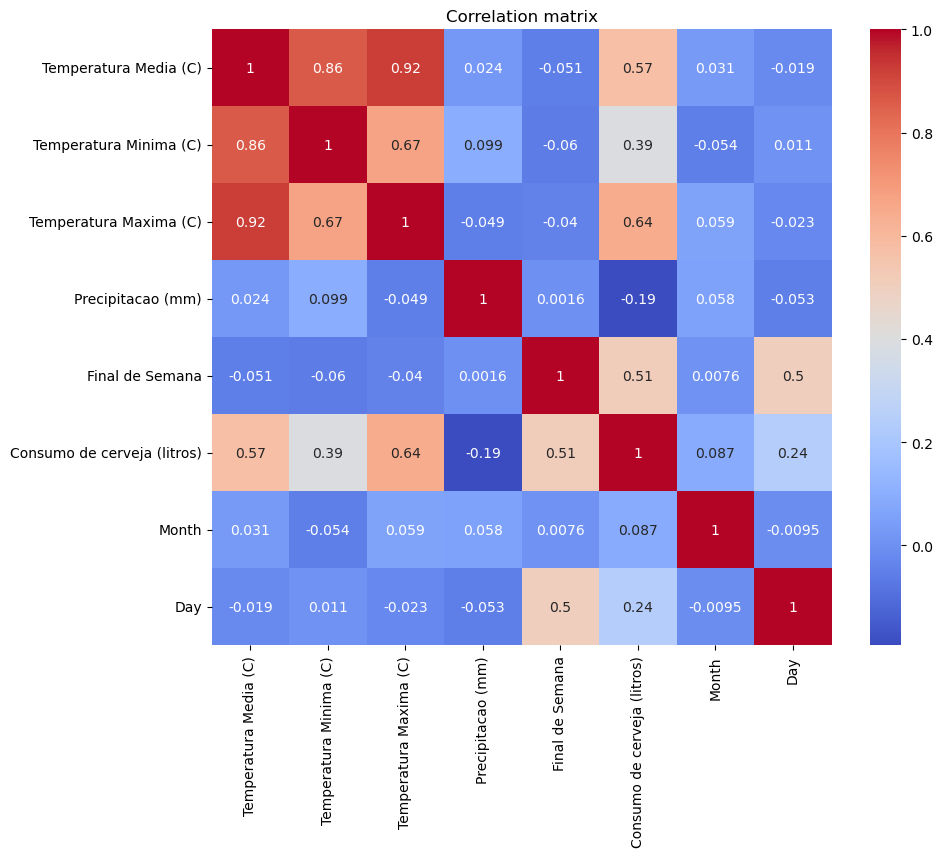

In [17]:
# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

In [18]:
# Analyze the correlation between features
threshold = 0.5 # Define the threshold for strong correlation

In [19]:
# find highly correlated feature pairs
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i,j]) >= threshold:
            high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j]))

In [20]:
# print the highly correlated feature pairs
print(f'Highly correlated feature pairs(correlation >={threshold}):')
for pair in high_corr_pairs:
    print(pair)

Highly correlated feature pairs(correlation >=0.5):
('Temperatura Media (C)', 'Temperatura Minima (C)')
('Temperatura Media (C)', 'Temperatura Maxima (C)')
('Temperatura Media (C)', 'Consumo de cerveja (litros)')
('Temperatura Minima (C)', 'Temperatura Maxima (C)')
('Temperatura Maxima (C)', 'Consumo de cerveja (litros)')
('Final de Semana', 'Consumo de cerveja (litros)')
('Final de Semana', 'Day')


In [21]:
# Split the dataset for training and testing

X = df.drop('Consumo de cerveja (litros)', axis=1)
y = df['Consumo de cerveja (litros)']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
#Train a linear regression model and print the intercept and coefficients

model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: 5.994242039955068
Coefficients: [ 0.06793164 -0.03865574  0.63798013 -0.04509858  5.14489623  0.06011966
  0.01041643]


In [23]:
#Evaluate the model

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)
print("R2 Score:", r2)
print("Mean Absolute Error:",mae)
print("Root Mean Absolute Error:",rmse)

R2 Score: 0.7473803694369803
Mean Absolute Error: 2.0065997624002763
Root Mean Absolute Error: 2.3659708466018095


# Problem Statement 2: Predict House Prices in California

In [25]:
df = pd.read_csv('california_housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15,5612,1283,1015,472,1.4936,66900
1,-114.47,34.40,19,7650,1901,1129,463,1.8200,80100
2,-114.56,33.69,17,720,174,333,117,1.6509,85700
3,-114.57,33.64,14,1501,337,515,226,3.1917,73400
4,-114.57,33.57,20,1454,326,624,262,1.9250,65500


In [27]:
df.shape

(17000, 9)

In [31]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64

In [33]:
# Split the dataset for training and testing - 1000 instances for testing
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, random_state=42)

In [34]:
# train the model using linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
#Predict the prices on test data and evaluate the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)

R2 Score: 0.6427633944326567
Mean Absolute Error: 52486.71121771133


In [37]:
#Find coefficient and intercept using the trained model
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)

Intercept: -3632877.842511664
Coefficients: [-4.32650586e+04 -4.29877050e+04  1.13224456e+03 -8.24971921e+00
  1.15173391e+02 -3.72835206e+01  4.39458716e+01  4.04437504e+04]


# Problem Statement 3: Predict Individual Medical Costs

In [38]:
df = pd.read_csv('medical_cost.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [40]:
df.shape

(1338, 7)

In [41]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [44]:
# convert categorical features to numerical values(One-Hot Encoding)

df = pd.get_dummies(df, drop_first=True)
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [47]:
# split the dataset for training and testing
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [49]:
# Train the model using linear regression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [50]:
# find the intercept and coefficient
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: -11931.219050326674
Coefficient: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02 -1.85916916e+01
  2.36511289e+04 -3.70677326e+02 -6.57864297e+02 -8.09799354e+02]


In [51]:
# predict the prices of test data and evalute the model
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("R2 Score:", r2)
print("Root Mean Squared Error:", rmse)

R2 Score: 0.7835929767120724
Root Mean Squared Error: 5796.284659276272


# Problem Statement 4: Predict Startup Profits

In [52]:
df = pd.read_csv('startup.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [53]:
df.shape

(50, 5)

In [54]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [57]:
#Convert categorical features to numerical values using Label Encoder

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['State'] = le.fit_transform(df['State'])

In [59]:
# Split the dataset for training and testing

X = df.drop('Profit', axis=1)
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
# Train the model using linear regression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [61]:
# Predict the profits on test data

y_pred = model.predict(X_test)

In [62]:
# find the coefficient and intercept

print("Intercept:",model.intercept_)
print("Coefficients:",model.coef_)

Intercept: 54080.716846113755
Coefficients: [  0.80379465  -0.06791023   0.03126059 -16.82030683]
